In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json



In [3]:
df = pd.read_csv("./final_dataset.csv")
df.head()

,tconst,primaryTitle,titleType,startYear,runtimeMinutes,genres,averageRating,numVotes,nconst,category
0,tt0008176,Leoni Leo,movie,1917,\N,Adventure,7.9,29,nm0000509,actor
1,tt0008176,Leoni Leo,movie,1917,\N,Adventure,7.9,29,nm0351330,actress
2,tt0008176,Leoni Leo,movie,1917,\N,Adventure,7.9,29,nm0312459,actor
3,tt0008176,Leoni Leo,movie,1917,\N,Adventure,7.9,29,nm0126595,actress
4,tt0008176,Leoni Leo,movie,1917,\N,Adventure,7.9,29,nm0738297,actress


In [4]:
df["runtimeMinutes"].value_counts()
#Making a copy before modifying
movie1 = df.copy()
#Replacing all the \N values with Numpy null
movie1["runtimeMinutes"] = movie1["runtimeMinutes"].replace("\\N", np.nan)
#Dropping all null values
movie1 = movie1.dropna()
movie1

,tconst,primaryTitle,titleType,startYear,runtimeMinutes,genres,averageRating,numVotes,nconst,category
13,tt0008177,Küzdelem a Létért,movie,1918,72,Drama,6.2,19,nm0000509,actor
14,tt0008177,Küzdelem a Létért,movie,1918,72,Drama,6.2,19,nm0351330,actress
15,tt0008177,Küzdelem a Létért,movie,1918,72,Drama,6.2,19,nm0676258,actress
16,tt0008177,Küzdelem a Létért,movie,1918,72,Drama,6.2,19,nm0878199,actor
17,tt0008177,Küzdelem a Létért,movie,1918,72,Drama,6.2,19,nm0530419,actress
...,...,...,...,...,...,...,...,...,...,...
65530,tt0020739,Captain Applejack,movie,1930,63,"Comedy,Crime,Drama",5.5,171,nm0330352,actress
65531,tt0020739,Captain Applejack,movie,1930,63,"Comedy,Crime,Drama",5.5,171,nm0136886,actor
65532,tt0020739,Captain Applejack,movie,1930,63,"Comedy,Crime,Drama",5.5,171,nm0389043,actor
65533,tt0020739,Captain Applejack,movie,1930,63,"Comedy,Crime,Drama",5.5,171,nm0203527,actor


In [5]:
#Displaying the datatype of each column
movie1.dtypes

tconst             object
primaryTitle       object
titleType          object
startYear           int64
runtimeMinutes     object
genres             object
averageRating     float64
numVotes            int64
nconst             object
category           object
dtype: object

In [6]:
#Replacing the runtimeMinutes values to integer
movie1['runtimeMinutes'] = movie1['runtimeMinutes'].astype(int)
movie1.dtypes

tconst             object
primaryTitle       object
titleType          object
startYear           int64
runtimeMinutes      int64
genres             object
averageRating     float64
numVotes            int64
nconst             object
category           object
dtype: object

In [7]:
from datetime import date

movie1['startYear'] = movie1['startYear'].astype(int)
movie1.dtypes

tconst             object
primaryTitle       object
titleType          object
startYear           int64
runtimeMinutes      int64
genres             object
averageRating     float64
numVotes            int64
nconst             object
category           object
dtype: object

In [8]:
movie2 = movie1.copy()
#Selecting the directors in the movie category
movie2 = movie2[movie2["category"]=="director"]
movie2

,tconst,primaryTitle,titleType,startYear,runtimeMinutes,genres,averageRating,numVotes,nconst,category
23,tt0008177,Küzdelem a Létért,movie,1918,72,Drama,6.2,19,nm0223460,director
31,tt0008179,The Last Suit,short,1915,10,Short,5.5,16,nm0523932,director
53,tt0008195,The Little Pirate,movie,1917,50,"Adventure,Family",4.3,25,nm0933368,director
67,tt0008196,A Little Princess,movie,1917,62,Drama,6.1,737,nm0624714,director
84,tt0008201,The Lone Wolf,movie,1917,60,"Crime,Drama",7.1,18,nm0107543,director
...,...,...,...,...,...,...,...,...,...,...
65472,tt0020728,Cameo Kirby,movie,1930,70,Drama,6.5,33,nm0191899,director
65497,tt0020736,Canyon Hawks,movie,1930,57,"Drama,Western",5.9,34,nm0416258,director
65498,tt0020736,Canyon Hawks,movie,1930,57,"Drama,Western",5.9,34,nm0569645,director
65513,tt0020738,La canzone dell'amore,movie,1930,94,Drama,6.1,45,nm0726729,director


In [9]:
#Dropping duplicate data
movie2 = movie2.drop_duplicates(subset=['tconst'])
movie2

,tconst,primaryTitle,titleType,startYear,runtimeMinutes,genres,averageRating,numVotes,nconst,category
23,tt0008177,Küzdelem a Létért,movie,1918,72,Drama,6.2,19,nm0223460,director
31,tt0008179,The Last Suit,short,1915,10,Short,5.5,16,nm0523932,director
53,tt0008195,The Little Pirate,movie,1917,50,"Adventure,Family",4.3,25,nm0933368,director
67,tt0008196,A Little Princess,movie,1917,62,Drama,6.1,737,nm0624714,director
84,tt0008201,The Lone Wolf,movie,1917,60,"Crime,Drama",7.1,18,nm0107543,director
...,...,...,...,...,...,...,...,...,...,...
65453,tt0020727,Murder for Sale,movie,1930,102,"Comedy,Musical",6.5,116,nm0777579,director
65472,tt0020728,Cameo Kirby,movie,1930,70,Drama,6.5,33,nm0191899,director
65497,tt0020736,Canyon Hawks,movie,1930,57,"Drama,Western",5.9,34,nm0416258,director
65513,tt0020738,La canzone dell'amore,movie,1930,94,Drama,6.1,45,nm0726729,director


<Axes: >

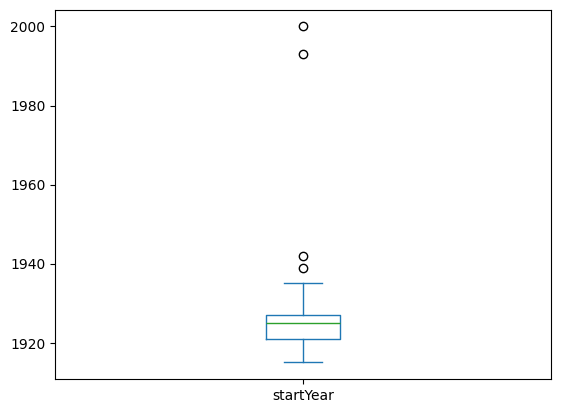

In [10]:
#Box plot to show the outliers in the StartYear Column
movie2["startYear"].plot(kind='box')

In [11]:
#Making a copy of data
movie3 = movie2.copy()
#Reducing the data set to classic movies released before 1935
movie3 = movie3[movie3["startYear"] <1935]
movie3

,tconst,primaryTitle,titleType,startYear,runtimeMinutes,genres,averageRating,numVotes,nconst,category
23,tt0008177,Küzdelem a Létért,movie,1918,72,Drama,6.2,19,nm0223460,director
31,tt0008179,The Last Suit,short,1915,10,Short,5.5,16,nm0523932,director
53,tt0008195,The Little Pirate,movie,1917,50,"Adventure,Family",4.3,25,nm0933368,director
67,tt0008196,A Little Princess,movie,1917,62,Drama,6.1,737,nm0624714,director
84,tt0008201,The Lone Wolf,movie,1917,60,"Crime,Drama",7.1,18,nm0107543,director
...,...,...,...,...,...,...,...,...,...,...
65453,tt0020727,Murder for Sale,movie,1930,102,"Comedy,Musical",6.5,116,nm0777579,director
65472,tt0020728,Cameo Kirby,movie,1930,70,Drama,6.5,33,nm0191899,director
65497,tt0020736,Canyon Hawks,movie,1930,57,"Drama,Western",5.9,34,nm0416258,director
65513,tt0020738,La canzone dell'amore,movie,1930,94,Drama,6.1,45,nm0726729,director


<Axes: >

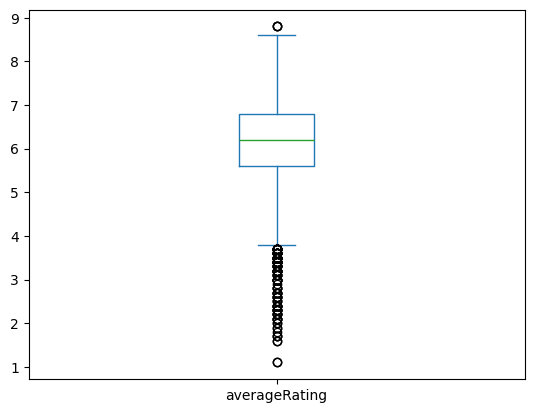

In [12]:
#Checking for outliers in the average rating column
movie3["averageRating"].plot(kind = 'box')

In [46]:
#Renaming columns to conventional names
movie3.rename(columns={'tconst':'movie_id'}, inplace=True)
movie3.rename(columns={'primaryTitle':'movie_title'}, inplace=True)
movie3.rename(columns={'nconst':'name_id'}, inplace=True)
#Reseting the index of the dataframe
movie3.reset_index(drop=True, inplace=True)
movie3


,movie_id,movie_title,titleType,startYear,runtimeMinutes,genres,averageRating,numVotes,name_id,category
0,tt0008177,Küzdelem a Létért,movie,1918,72,Drama,6.2,19,nm0223460,director
1,tt0008179,The Last Suit,short,1915,10,Short,5.5,16,nm0523932,director
2,tt0008195,The Little Pirate,movie,1917,50,Adventure Family,4.3,25,nm0933368,director
3,tt0008196,A Little Princess,movie,1917,62,Drama,6.1,737,nm0624714,director
4,tt0008201,The Lone Wolf,movie,1917,60,Crime Drama,7.1,18,nm0107543,director
...,...,...,...,...,...,...,...,...,...,...
4277,tt0020727,Murder for Sale,movie,1930,102,Comedy Musical,6.5,116,nm0777579,director
4278,tt0020728,Cameo Kirby,movie,1930,70,Drama,6.5,33,nm0191899,director
4279,tt0020736,Canyon Hawks,movie,1930,57,Drama Western,5.9,34,nm0416258,director
4280,tt0020738,La canzone dell'amore,movie,1930,94,Drama,6.1,45,nm0726729,director


In [14]:
#Replacing the commas in each column
movie3["movie_title"] = movie3["movie_title"].str.replace(",", " ", regex=False)
movie3["genres"] = movie3["genres"].str.replace(",", " ", regex=False)


<Axes: xlabel='titleType', ylabel='Count'>

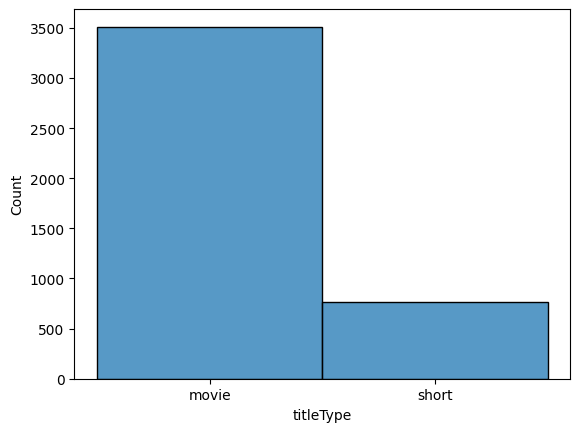

In [15]:
#Relationship between the data title type
sns.histplot(data=movie3, x='titleType', bins=2, binwidth=20)

The Movies title type dominated in total vote cast, and this indicated that this content 
type is popular amidst the audience. It attracts majority of the voters although shorts have
more average rating. This means that the quality of the core content is excellent based 
on the audience perspective. Audiences are more satisfied with the runtime and content 
length

In [49]:
movie3[["movie_title","averageRating"]].sort_values(by="averageRating",  ascending=False).head(10)

,movie_title,averageRating
107,Tom Jones,8.8
2136,Hot Doggie,8.8
2707,Satan Town,8.8
2827,Almost Human,8.6
2657,Not to Be Trusted,8.6
2406,The Amateur Gentleman,8.6
203,The Eyes of Mystery,8.6
1092,The Rider of the King Log,8.5
299,On the Quiet,8.5
182,Cecilia of the Pink Roses,8.5


The top-rated content based on average rating describes contents that are the best in 
the century. These are acclaimed classics movie that are very popular and would be a 
good fit for premium collections or special promotions. Such contents can be used to
headline the classic collections. Movies like Hot Doggie, Satan Town, Tom Jones are one 
of the top movies of the century

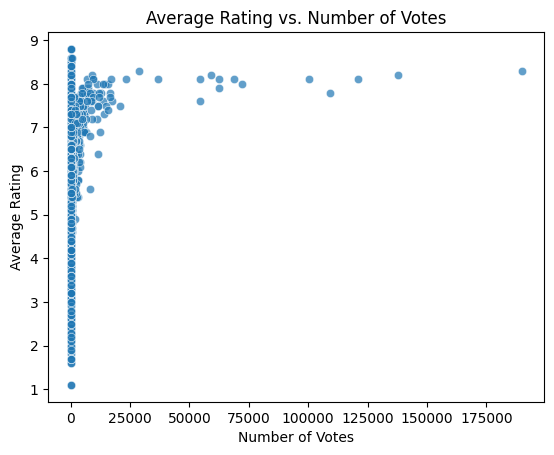

In [55]:
sns.scatterplot(data=movie3, x="numVotes", y="averageRating", alpha=0.7)
plt.title("Average Rating vs. Number of Votes")
plt.xlabel("Number of Votes")
plt.ylabel("Average Rating")


Text(0.5, 1.0, 'Correlation Matrix')

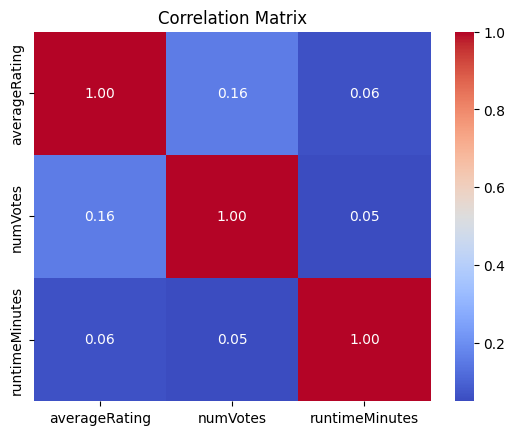

In [57]:
numeric_cols = ["averageRating", "numVotes", "runtimeMinutes"]
corr_matrix = movie3[numeric_cols].corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")


Text(0, 0.5, 'Number of Movies')

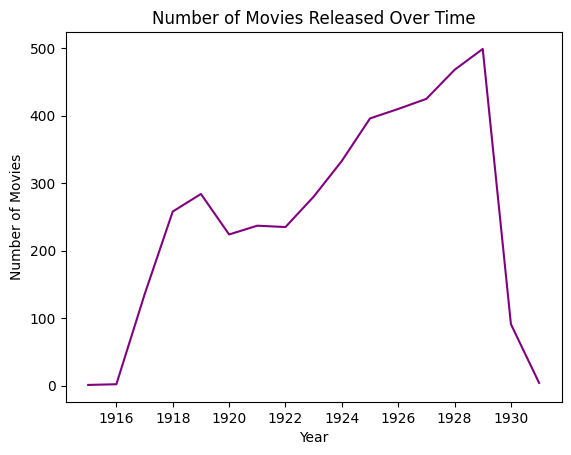

In [58]:
movies_per_year = movie3.groupby("startYear").size()

sns.lineplot(x=movies_per_year.index, y=movies_per_year.values, color="purple")
plt.title("Number of Movies Released Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Movies")


This comprehensive analysis of the classic movie dataset created a deep knowledge into
how audience prefer content and the engagement patterns of classic films. After carrying 
out these analyses the recommendation that was prescribed can significantly impact the 
content strategy and how the business can be done. Multiple variables like title types, 
ratings, genres, runtime, and user engagement metrics, were analysed in the process 
and several key patterns were discovered.
The analysis also revealed that the engagement of contents by users can vary across 
different content types and genres especially when different performance metrics are 
used. After considering the voting patterns and average ratings, a very broad view into 
the viewer preferences and content quality was also created. This includes the 
relationship between genre diversity and the user engagement, the impact of content 
duration on how well viewers are satisfied, and the influence of some specific directors 
on how well a content would perform.
By using these recommendations, the business can improve its classic movie collection
to cater for the needs of diverse audience. This data analysis approach ensures that the 
collection will not only preserve the cinematic heritage of the past century, but it can also
deliver engaging and meaningful experiences to all audience no matter their age bracket.


In [18]:
#Importing data into Json format for unstructed data processing using MongoDB
json_data = movie3.copy()
json_output = ("movie_json.json")
json_data.to_json(json_output, indent=1, orient="records")